In [24]:
from boxoffice.db.frames import get_movie_frame_c, get_box_office_day_frame
import numpy as np

frame = get_movie_frame_c()
bodf = get_box_office_day_frame()

In [23]:
# print out the percentiles, every 5%
quantiles = frame['total_box_office'].quantile([i/20 for i in range(21)])

np.set_printoptions(suppress=True, precision=2)

print(quantiles)

# print the percent of the movies that made less than $1M
percent = 100 * len(frame[frame['total_box_office'] < 1_000_000]) / len(frame)
print(f'{percent:.2f}% of movies made less than $1M')

0.00    4.000000e+00
0.05    9.202500e+02
0.10    2.807500e+03
0.15    7.715000e+03
0.20    1.710800e+04
0.25    3.725450e+04
0.30    9.355150e+04
0.35    2.171175e+05
0.40    5.148700e+05
0.45    1.251120e+06
0.50    2.673668e+06
0.55    5.211552e+06
0.60    9.501592e+06
0.65    1.552670e+07
0.70    2.249111e+07
0.75    3.221093e+07
0.80    4.380831e+07
0.85    6.002250e+07
0.90    8.818442e+07
0.95    1.512873e+08
1.00    9.926427e+08
Name: total_box_office, dtype: float64
43.68% of movies made less than $1M


<Axes: xlabel='days', ylabel='box_office'>

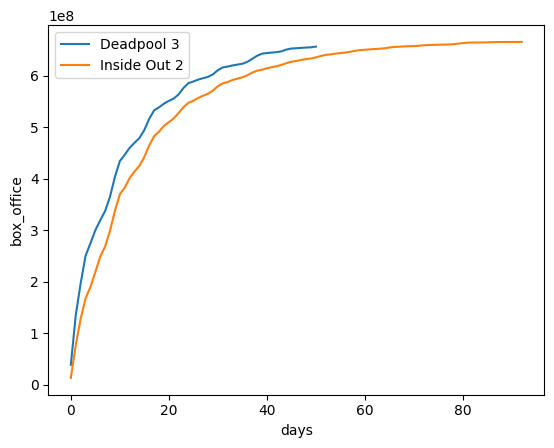

In [30]:
deadpool_id = 1
inside_out_id = 5

# filer the box office day frame to only include deadpool and inside out
deadpool = bodf[bodf['movie'] == deadpool_id]
inside_out = bodf[bodf['movie'] == inside_out_id]

# sort the data by day
deadpool = deadpool.sort_values('date')
inside_out = inside_out.sort_values('date')

# reset index
deadpool = deadpool.reset_index()
inside_out = inside_out.reset_index()

# calculate the cumulative box office
deadpool['box_office'] = deadpool['revenue'].cumsum()
inside_out['box_office'] = inside_out['revenue'].cumsum()

# double cumulative line plots, same y axis
import seaborn as sns

# x axis as number of days since release
deadpool['days'] = deadpool.index
inside_out['days'] = inside_out.index

sns.lineplot(x='days', y='box_office', data=deadpool, label='Deadpool 3')
sns.lineplot(x='days', y='box_office', data=inside_out, label='Inside Out 2')